# Examine cluster masses in DES RedMaPPer sample: ACT overlap region

In [56]:
import numpy as np
import healpy as hp
from astropy.io import fits
import warnings
warnings.filterwarnings(action='once')
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [57]:
des = fits.open("/mnt/scratch-lustre/mlokken/RM_cats/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl02_catalog.fit")
desclustrs = des[1].data
hdr = des[1].header
des.close()

## Limit region only to ACT Overlap area

In [61]:
#This range is approximate
desclustrs_act = desclustrs[np.logical_and(np.logical_or(desclustrs['RA']>355, desclustrs['RA']<40), np.logical_and(desclustrs['DEC']>-3, desclustrs['DEC']<4))]


In [62]:
ra = desclustrs_act['RA']
dec = desclustrs_act['DEC']
z = desclustrs_act['Z_LAMBDA']
richness = desclustrs_act['LAMBDA_CHISQ']

In [63]:
minz = min(z)
maxz = max(z)
print("Minimum redshift: %f, maximum redshift: %f" %(minz,maxz) )

Minimum redshift: 0.100339, maximum redshift: 0.751326


In [64]:
hdr

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  730 /Number of bytes per row                         
NAXIS2  =               268173 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   69 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

# richness relation

from https://arxiv.org/pdf/1805.00039.pdf

In [65]:
M_0 = 3.081
F = 1.356
G = -0.30
M_clust = M_0 * (richness/40.)**F *((1+z)/1.35)**G

In [66]:
#Minimum cluster mass is:

np.amin(M_clust) # times 10^14 M_sun

0.17194638

<input>:2: DeprecationWarning: invalid escape sequence \o
<ipython-input-68-3a32c2a1444c>:2: DeprecationWarning: invalid escape sequence \o
  plt.xlabel('$M_{200} [10^{14} M_\odot$]')


Text(0.5,1,'Cluster masses in ACT region')

/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda/3-5.3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


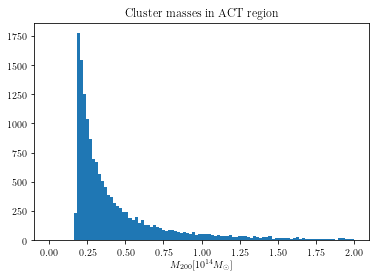

In [68]:
plt.hist(M_clust, bins = 100, range = [0,2])
plt.xlabel('$M_{200} [10^{14} M_\odot$]')
plt.title("Cluster masses in ACT region")